# Interpolated modles comparison, error calculations and model correlations

In this notebook firstly for ASV data ELEVATION is calculated, both Valle (Utsjoki) and Nuorgam separately. For ALS data the ELEVATION is from IDW column. In Valle ALS data it is however from HEIGHT column. Then a correlation is performed to see wether IDW or TIN model is better in case of ASV, because PDAL Pipeline does IDW interpolation for ALS point cloud. Then lastly, a correlation between ASV and ALS is done from random points.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.linear_model import LinearRegression

## Valle (Utsjoki) elevation calculation IDW

In [2]:
# read in data
valle_asv = pd.read_csv('../data/output/0.25/valle_ASV_validation_table.csv', delimiter=',')

In [3]:
valle_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfPo,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,3,24,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,-2.185422
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,3,23,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,-2.295642
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,3,23,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,-2.227414
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,3,23,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,-2.275396
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,4,23,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,-2.236089
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,4,24,18.6.2023,10:36:38.000,7:36:38,2267,27415,2267,27418,-2.167507
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,4,24,18.6.2023,10:37:06.000,7:37:06,2267,27443,2267,27446,-2.068015
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,4,24,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-2.043428
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,3,24,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.909540
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,3,24,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.478516


In [4]:
# set shoreline elevation
valle_asv['PointLocation_Elevation'] = 66.016000

In [5]:
valle_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,PointLocation_Elevation
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,24,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,-2.185422,66.016
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,23,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,-2.295642,66.016
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,23,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,-2.227414,66.016
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,23,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,-2.275396,66.016
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,23,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,-2.236089,66.016
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,24,18.6.2023,10:36:38.000,7:36:38,2267,27415,2267,27418,-2.167507,66.016
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,24,18.6.2023,10:37:06.000,7:37:06,2267,27443,2267,27446,-2.068015,66.016
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,24,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-2.043428,66.016
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,24,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.909540,66.016
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,24,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.478516,66.016


In [6]:
# check columns
valle_asv.columns

Index(['PointNo', 'Northing', 'Easting', 'Elevation', 'Latitude', 'Longitude',
       'Height', 'Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco', 'SAMPLE_1',
       'PointLocation_Elevation'],
      dtype='object')

In [7]:
# remove unnecessary columns
valle_asv = valle_asv.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [8]:
# rename column
valle_asv = valle_asv.rename(columns={"SAMPLE_1": "ASV_Depth"})

In [9]:
# calculate elevation for asv data
valle_asv['ASV_Elevation'] = valle_asv['PointLocation_Elevation'] + valle_asv['ASV_Depth']

In [10]:
valle_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,ASV_Depth,PointLocation_Elevation,ASV_Elevation
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,-2.185422,66.016,63.830578
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,-2.295642,66.016,63.720358
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,-2.227414,66.016,63.788586
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,-2.275396,66.016,63.740604
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,-2.236089,66.016,63.779911
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,-2.167507,66.016,63.848493
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,-2.068015,66.016,63.947985
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,-2.043428,66.016,63.972572
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,-1.909540,66.016,64.106460
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,-1.478516,66.016,64.537484


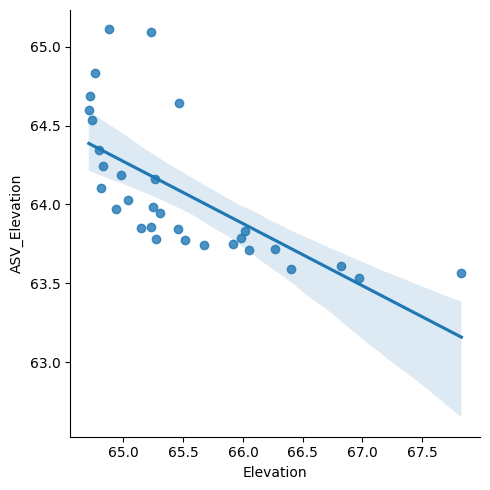

In [11]:
# calculate correlation between validation and asv elevation
sns.lmplot(x="Elevation", y="ASV_Elevation", data=valle_asv)

## Compute RMSE, MAE and MAXE, R2

In [12]:
# set values to list to perform error calculations
valle_asv_actual = valle_asv['Elevation'].values.tolist()
valle_asv_actual

[66.016,
 66.272,
 65.981,
 65.67,
 65.275,
 65.144,
 65.307,
 64.937,
 64.808,
 64.737,
 64.722,
 64.71,
 64.797,
 64.832,
 64.981,
 65.249,
 65.037,
 65.233,
 65.515,
 66.05,
 65.455,
 65.916,
 65.268,
 65.227,
 65.464,
 64.875,
 64.766,
 66.82,
 67.828,
 66.975,
 66.404]

In [13]:
valle_asv_predicted = valle_asv['ASV_Elevation'].values.tolist()
valle_asv_predicted

[63.830578100000004,
 63.72035770000001,
 63.78858640000001,
 63.74060370000001,
 63.7799108,
 63.84849330000001,
 63.947985100000004,
 63.97257210000001,
 64.1064604,
 64.5374841,
 64.68916200000001,
 64.6009731,
 64.34641300000001,
 64.24220220000001,
 64.1866219,
 63.980989900000004,
 64.03128260000001,
 63.856369300000004,
 63.7733113,
 63.71426410000001,
 63.847183900000005,
 63.751977600000004,
 64.16118130000001,
 65.09284051,
 64.64334790000001,
 65.10829601,
 64.83184320000001,
 63.6112516,
 63.566888000000006,
 63.53687970000001,
 63.594449100000006]

In [14]:
MSE = mean_squared_error(valle_asv_actual, valle_asv_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.7838706318406874


In [15]:
MAE = mean_absolute_error(valle_asv_actual, valle_asv_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

1.4331780161290262


In [16]:
# Compute max_error
MAXE = max_error(valle_asv_actual, valle_asv_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

4.261111999999997


In [17]:
# Compute r2 --- THIS R2 IS WRONG -> CORRECT ONE AT THE END AT THE LINEAR REGRESSION CHAPTER
#R2 = r2_score(valle_asv_actual, valle_asv_predicted)

#print("Coefficient of determination regression score:\n")
#print(R2)

## Valle (Utsjoki) elevation calculation TIN

In [18]:
# read in TIN data and do the same procedures as was done above
valle_TIN = pd.read_csv('../data/output/0.25/valle_TIN_0.25_validation_table.csv', delimiter=',')

In [19]:
valle_TIN['PointLocation_Elevation'] = 66.016000

In [20]:
valle_TIN = valle_TIN.rename(columns={"SAMPLE_1": "TIN_Depth"})

In [21]:
# remove unnecessary columns
valle_TIN = valle_TIN.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [22]:
# check
valle_TIN

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,TIN_Depth,PointLocation_Elevation
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,NaN,66.016
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,NaN,66.016
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,NaN,66.016
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,NaN,66.016
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,NaN,66.016
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,NaN,66.016
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,NaN,66.016
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,-1.166749,66.016
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,-1.173518,66.016
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,-1.290926,66.016


In [23]:
valle_TIN['ASV_Elevation'] = valle_TIN['PointLocation_Elevation'] + valle_TIN['TIN_Depth']

In [24]:
# check (drop) no values
valle_TIN = valle_TIN.dropna()

In [25]:
valle_TIN

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,TIN_Depth,PointLocation_Elevation,ASV_Elevation
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,-1.166749,66.016,64.849251
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,-1.173518,66.016,64.842482
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,-1.290926,66.016,64.725074
10,valle11,7757616.924,500059.411,64.722,69.925965,27.001551,89.026915,-1.160556,66.016,64.855444
11,valle12,7757621.782,500058.338,64.710,69.926008,27.001523,89.015000,-1.242703,66.016,64.773297
12,valle13,7757620.598,500056.306,64.797,69.925997,27.001470,89.102403,-1.129680,66.016,64.886320
13,valle14,7757619.900,500052.496,64.832,69.925991,27.001370,89.137092,-1.077362,66.016,64.938638
14,valle15,7757619.409,500051.109,64.981,69.925987,27.001334,89.286498,-0.800669,66.016,65.215331
15,valle16,7757621.391,500047.147,65.249,69.926005,27.001231,89.554811,-1.140027,66.016,64.875974
16,valle17,7757629.287,500046.620,65.037,69.926075,27.001217,89.342939,-0.989542,66.016,65.026458


In [26]:
valle_TIN_actual = valle_TIN['Elevation'].values.tolist()

In [27]:
valle_TIN_predicted = valle_TIN['ASV_Elevation'].values.tolist()

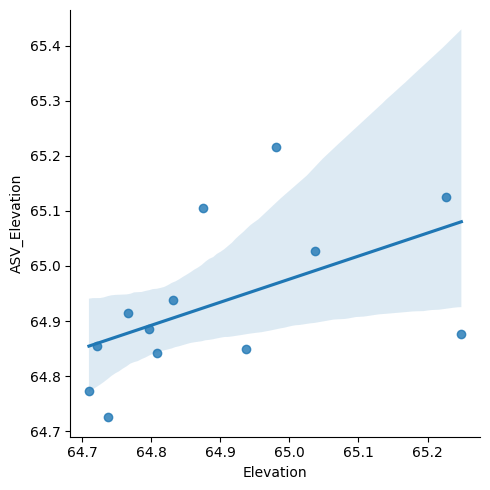

In [28]:
sns.lmplot(x="Elevation", y="ASV_Elevation", data=valle_TIN)

In [29]:
MSE = mean_squared_error(valle_TIN_actual, valle_TIN_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.15939295795653236


In [30]:
MAE = mean_absolute_error(valle_TIN_actual, valle_TIN_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.1251294530769273


In [31]:
# Compute max_error
MAXE = max_error(valle_TIN_actual, valle_TIN_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.3730264999999946


In [32]:
# Compute r2
#R2 = r2_score(valle_TIN_actual, valle_TIN_predicted)

#print("Coefficient of determination regression score:\n")
#print(R2)

## Valle (Utsjoki) ALS

In [33]:
# read in als data
valle_als = pd.read_csv('../data/output/0.25/valle_ALS_validation_table.csv', delimiter=',')

In [34]:
valle_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,2267,27216,2267,27218,90.10,90.87,90.534211,90.529521,19,0.283592
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,2267,27236,2267,27238,90.33,91.17,90.780000,90.763832,19,0.298170
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,2267,27268,2267,27270,90.09,90.89,90.543684,90.501440,19,0.274115
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,2267,27297,2267,27299,89.85,90.70,90.234615,90.273429,13,0.286668
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,2267,27322,2267,27325,89.35,90.12,89.697500,89.776826,12,0.299308
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,2267,27415,2267,27418,89.09,89.91,89.513500,89.484570,20,0.261348
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,2267,27443,2267,27446,89.28,90.08,89.665714,89.627307,14,0.294005
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,2267,27494,2267,27497,88.81,89.82,89.280625,89.283817,16,0.304846
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,2267,27531,2267,27533,88.68,89.72,89.158889,89.119383,18,0.285363
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,2267,27566,2267,27568,88.62,89.38,89.017143,89.018575,14,0.239834


In [35]:
# remove unnecessary columns
valle_als = valle_als.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [36]:
valle_als = valle_als.rename(columns={"SAMPLE_4": "IDW"})

In [37]:
# test round values
#valle_als_round = valle_als
#valle_als_round['Height'] = valle_als_round['Height'].round(2)
#valle_als_round['IDW'] = valle_als_round['IDW'].round(2)

In [38]:
#valle_als_round.head()

In [39]:
# test try to get (print) most familiar points
#list(set(valle_als.Height) & set(valle_als.IDW))

In [40]:
tolerance = 0.05

valle_als.loc[
    abs(valle_als['Height'] - valle_als['IDW']) < tolerance
]

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,SAMPLE_1,SAMPLE_2,SAMPLE_3,IDW,SAMPLE_5,SAMPLE_6
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,89.09,89.91,89.513500,89.484570,20,0.261348
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,89.28,90.08,89.665714,89.627307,14,0.294005
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,88.81,89.82,89.280625,89.283817,16,0.304846
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,88.68,89.72,89.158889,89.119383,18,0.285363
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,88.62,89.38,89.017143,89.018575,14,0.239834
15,valle16,7757621.391,500047.147,65.249,69.926005,27.001231,89.554811,89.20,89.99,89.520000,89.539189,22,0.259002
24,valle25,7757612.443,500049.549,65.464,69.925924,27.001293,89.769848,89.42,90.29,89.774000,89.804886,15,0.278993
26,valle27,7757616.059,500059.885,64.766,69.925957,27.001563,89.071451,88.69,89.71,89.066471,89.056792,17,0.285471


In [41]:
valle_als_actual = valle_als['Height'].values.tolist()

In [42]:
valle_als_predicted = valle_als['IDW'].values.tolist()

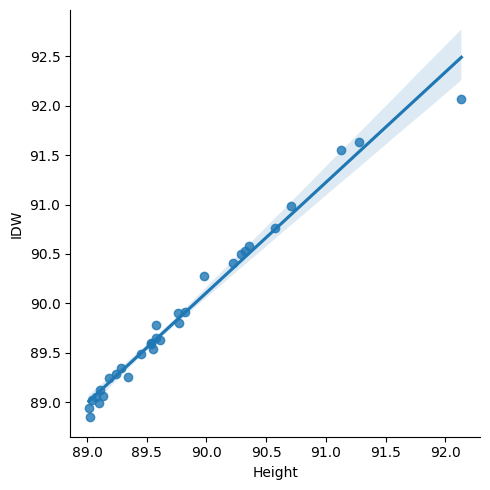

In [43]:
sns.lmplot(x="Height", y="IDW", data=valle_als)

## Compute RMSE, MAE, MAXE, R2

In [44]:
MSE = mean_squared_error(valle_als_actual, valle_als_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.16526257931156874


In [45]:
MAE = mean_absolute_error(valle_als_actual, valle_als_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.12614583495443576


In [46]:
# Compute max_error
MAXE = max_error(valle_als_actual, valle_als_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.427248066521301


In [47]:
# Compute r2
#R2 = r2_score(valle_als_actual, valle_als_predicted)

#print("Coefficient of determination regression score:\n")
#print(R2)

# Nuorgam Elevation calculation ASV IDW

In [48]:
# read in Nuorgam asv data
nuorgam_asv = pd.read_csv('../data/output/0.25/nuorgam_ASV_validation_table.csv', delimiter=',')

In [49]:
nuorgam_asv['PointLocation_Elevation'] = 13.395000000000000

In [50]:
nuorgam_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,PointLocation_Elevation
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,1.3,...,25,17.6.2023,18:13:01.000,15:13:01,2266,573198,2266,573201,-1.571486,13.395
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,1.3,...,25,17.6.2023,18:13:22.000,15:13:22,2266,573217,2266,573221,-1.582583,13.395
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,1.3,...,25,17.6.2023,18:13:43.000,15:13:43,2266,573239,2266,573242,-1.568659,13.395
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,1.3,...,25,17.6.2023,18:14:02.000,15:14:02,2266,573259,2266,573261,-1.579846,13.395
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,1.3,...,25,17.6.2023,18:14:20.000,15:14:20,2266,573277,2266,573279,-1.579843,13.395
5,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,1.3,...,25,17.6.2023,18:14:41.000,15:14:41,2266,573298,2266,573300,-1.607561,13.395
6,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,1.3,...,25,17.6.2023,18:14:59.000,15:14:59,2266,573316,2266,573319,-1.602496,13.395
7,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,1.3,...,25,17.6.2023,18:15:19.000,15:15:19,2266,573336,2266,573339,-1.590459,13.395
8,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,1.3,...,25,17.6.2023,18:15:40.000,15:15:40,2266,573357,2266,573359,-1.578435,13.395
9,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,1.3,...,25,17.6.2023,18:16:04.000,15:16:04,2266,573381,2266,573384,-1.568138,13.395


In [51]:
# remove unnecessary columns
nuorgam_asv = nuorgam_asv.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [52]:
nuorgam_asv = nuorgam_asv.rename(columns={"SAMPLE_1": "ASV_Depth"})

In [53]:
nuorgam_asv['ASV_Elevation'] = nuorgam_asv['PointLocation_Elevation'] + nuorgam_asv["ASV_Depth"]

In [54]:
nuorgam_asv = nuorgam_asv.dropna()

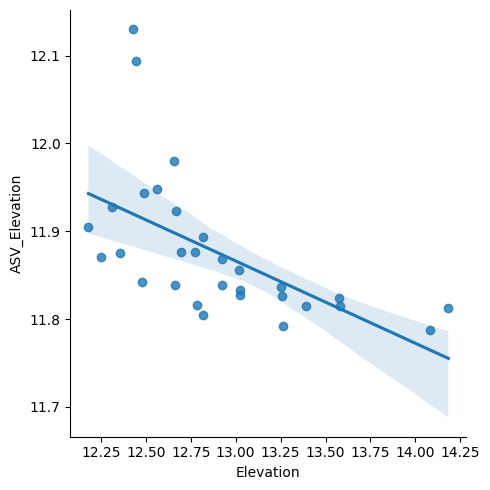

In [55]:
sns.lmplot(x="Elevation", y="ASV_Elevation", data=nuorgam_asv)

## Compute RMSE, MAE, MAXE, R2

In [56]:
nuorgam_asv_actual = nuorgam_asv['Elevation'].values.tolist()

In [57]:
nuorgam_asv_predicted = nuorgam_asv['ASV_Elevation'].values.tolist()

In [58]:
MSE = mean_squared_error(nuorgam_asv_actual, nuorgam_asv_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.1568474726087066


In [59]:
MAE = mean_absolute_error(nuorgam_asv_actual, nuorgam_asv_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

1.0201863400000006


In [60]:
# Compute max_error
MAXE = max_error(nuorgam_asv_actual, nuorgam_asv_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

2.3705827


In [61]:
# Compute r2
#R2 = r2_score(nuorgam_asv_actual, nuorgam_asv_predicted)

#print("Coefficient of determination regression score:\n")
#print(R2)

Nuorgam ASV TIN calculations couldn't be done due to lack of samples (only one (1) validation point reached the TIN interpolation model).

## Nuorgam Elevation calculation ALS

In [62]:
# read in ALS data
nuorgam_als = pd.read_csv('../data/output/0.25/nuorgam_ALS_validation_table.csv', delimiter=',')

In [63]:
nuorgam_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,1.3,...,2266,573198,2266,573201,13.56,13.82,13.680000,13.688744,6,0.086410
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,1.3,...,2266,573217,2266,573221,13.79,14.26,14.051429,14.062061,7,0.144956
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,1.3,...,2266,573239,2266,573242,13.21,13.32,13.280000,13.286187,5,0.037417
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,1.3,...,2266,573259,2266,573261,13.61,13.68,13.655000,13.643451,4,0.026926
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,1.3,...,2266,573277,2266,573279,13.44,13.51,13.476667,13.468317,3,0.028674
5,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,1.3,...,2266,573298,2266,573300,14.09,15.01,14.519000,14.806798,10,0.293171
6,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,1.3,...,2266,573316,2266,573319,13.25,13.33,13.296000,13.292660,5,0.028000
7,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,1.3,...,2266,573336,2266,573339,12.74,12.84,12.774000,12.776020,5,0.037736
8,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,1.3,...,2266,573357,2266,573359,12.72,12.82,12.760000,12.745913,3,0.043205
9,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,1.3,...,2266,573381,2266,573384,12.98,13.09,13.045000,13.051075,4,0.043875


In [64]:
# remove unnecessary columns
nuorgam_als = nuorgam_als.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'HDOP', 'VDOP',
       'NumberOfPo', 'NumberOfSa', 'Day', 'TSC3Time', 'TSC3UTC', 'StartGPSwe',
       'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [65]:
nuorgam_als = nuorgam_als.rename(columns={"SAMPLE_4": "IDW"})

In [66]:
nuorgam_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,SAMPLE_1,SAMPLE_2,SAMPLE_3,IDW,SAMPLE_5,SAMPLE_6
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,13.56,13.82,13.680000,13.688744,6,0.086410
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,13.79,14.26,14.051429,14.062061,7,0.144956
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,13.21,13.32,13.280000,13.286187,5,0.037417
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,13.61,13.68,13.655000,13.643451,4,0.026926
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,13.44,13.51,13.476667,13.468317,3,0.028674
5,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,14.09,15.01,14.519000,14.806798,10,0.293171
6,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,13.25,13.33,13.296000,13.292660,5,0.028000
7,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,12.74,12.84,12.774000,12.776020,5,0.037736
8,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,12.72,12.82,12.760000,12.745913,3,0.043205
9,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,12.98,13.09,13.045000,13.051075,4,0.043875


In [67]:
nuorgam_als_actual = nuorgam_als['Elevation'].values.tolist()

In [68]:
nuorgam_als_predicted = nuorgam_als['IDW'].values.tolist()

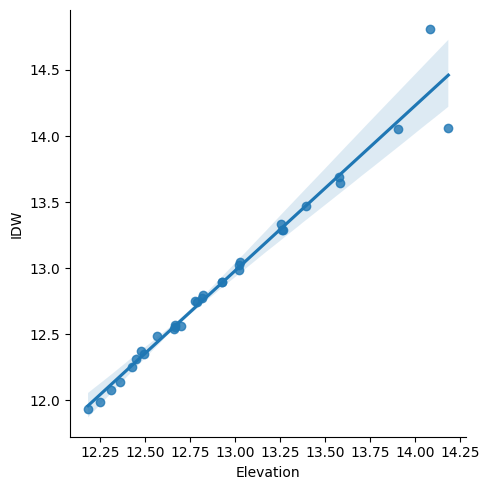

In [69]:
sns.lmplot(x="Elevation", y="IDW", data=nuorgam_als)

## Compute RMSE, MAE, MAXE, R2

In [70]:
MSE = mean_squared_error(nuorgam_als_actual, nuorgam_als_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.17681145003216284


In [71]:
MAE = mean_absolute_error(nuorgam_als_actual, nuorgam_als_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.11840849070220001


In [72]:
# Compute max_error
MAXE = max_error(nuorgam_als_actual, nuorgam_als_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.7277976715493999


In [73]:
# Compute r2
#R2 = r2_score(nuorgam_als_actual, nuorgam_als_predicted)

#print("Coefficient of determination regression score:\n")
#print(R2)

# Correlation testing Valle (Utsjoki)

In [74]:
# read in random points data
valle_corr_asv = pd.read_csv('../data/output/0.25/valle_ASV_IDW_random_points.csv', delimiter=',')
#valle_corr_asv = pd.read_csv('../data/output/0.25/valle_ASV_random_points_2.csv', delimiter=',')
valle_corr_asv_TIN = pd.read_csv('../data/output/0.25/valle_ASV_TIN_random_points.csv', delimiter=',')
valle_corr_als = pd.read_csv('../data/output/0.25/valle_ALS_random_points.csv', delimiter=',')

In [75]:
# check
valle_corr_asv

,id,SAMPLE_1
0,0,-3.567644
1,1,-2.655939
2,2,-2.994284
3,3,-2.806739
4,4,-3.178693
...,...,...
295,295,-3.361742
296,296,-3.118646
297,297,-1.837714
298,298,-3.098584


In [76]:
valle_corr_als

,id,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,0,86.87,90.45,89.313750,88.430109,8,1.404118
1,1,87.54,89.83,88.417692,88.295792,13,0.788340
2,2,87.87,90.49,89.005714,89.052633,7,1.279742
3,3,87.38,89.82,88.089474,88.067866,19,0.962056
4,4,71.64,89.93,88.706333,88.751447,30,3.368034
...,...,...,...,...,...,...,...
295,295,89.74,89.74,89.740000,89.740000,1,0.000000
296,296,NaN,NaN,NaN,NaN,0,NaN
297,297,79.45,89.85,87.963684,87.612876,19,2.077005
298,298,NaN,NaN,NaN,NaN,0,NaN


In [77]:
# merge information to asv df
valle_corr_asv["ALS_IDW"] = valle_corr_als["SAMPLE_4"]

In [78]:
valle_corr_asv

,id,SAMPLE_1,ALS_IDW
0,0,-3.567644,88.430109
1,1,-2.655939,88.295792
2,2,-2.994284,89.052633
3,3,-2.806739,88.067866
4,4,-3.178693,88.751447
...,...,...,...
295,295,-3.361742,89.740000
296,296,-3.118646,NaN
297,297,-1.837714,87.612876
298,298,-3.098584,NaN


In [79]:
valle_corr_asv['ASV_TIN'] = valle_corr_asv_TIN['SAMPLE_1']

In [80]:
valle_corr_asv

,id,SAMPLE_1,ALS_IDW,ASV_TIN
0,0,-3.567644,88.430109,-3.540
1,1,-2.655939,88.295792,-2.620
2,2,-2.994284,89.052633,-3.010
3,3,-2.806739,88.067866,-2.810
4,4,-3.178693,88.751447,-3.180
...,...,...,...,...
295,295,-3.361742,89.740000,-3.365
296,296,-3.118646,NaN,-3.125
297,297,-1.837714,87.612876,-1.855
298,298,-3.098584,NaN,-3.115


In [81]:
valle_corr_asv = valle_corr_asv.rename(columns={"SAMPLE_1": "ASV_IDW"})

In [82]:
# check
valle_corr_asv

,id,ASV_IDW,ALS_IDW,ASV_TIN
0,0,-3.567644,88.430109,-3.540
1,1,-2.655939,88.295792,-2.620
2,2,-2.994284,89.052633,-3.010
3,3,-2.806739,88.067866,-2.810
4,4,-3.178693,88.751447,-3.180
...,...,...,...,...
295,295,-3.361742,89.740000,-3.365
296,296,-3.118646,NaN,-3.125
297,297,-1.837714,87.612876,-1.855
298,298,-3.098584,NaN,-3.115


In [83]:
# drop no vales
valle_corr_asv = valle_corr_asv.dropna()

In [84]:
valle_corr_asv

,id,ASV_IDW,ALS_IDW,ASV_TIN
0,0,-3.567644,88.430109,-3.540
1,1,-2.655939,88.295792,-2.620
2,2,-2.994284,89.052633,-3.010
3,3,-2.806739,88.067866,-2.810
4,4,-3.178693,88.751447,-3.180
...,...,...,...,...
293,293,-3.387006,87.994366,-3.355
294,294,-2.996475,87.822089,-3.000
295,295,-3.361742,89.740000,-3.365
297,297,-1.837714,87.612876,-1.855


In [85]:
valle_corr_asv['ASV_IDW_SameAsALS'] = valle_corr_asv['ASV_IDW'] + 66.016000 + 24.3

/tmp/ipykernel_95/1028348265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valle_corr_asv['ASV_IDW_SameAsALS'] = valle_corr_asv['ASV_IDW'] + 66.016000 + 24.3


In [86]:
valle_corr_asv

,id,ASV_IDW,ALS_IDW,ASV_TIN,ASV_IDW_SameAsALS
0,0,-3.567644,88.430109,-3.540,86.748356
1,1,-2.655939,88.295792,-2.620,87.660061
2,2,-2.994284,89.052633,-3.010,87.321716
3,3,-2.806739,88.067866,-2.810,87.509261
4,4,-3.178693,88.751447,-3.180,87.137307
...,...,...,...,...,...
293,293,-3.387006,87.994366,-3.355,86.928994
294,294,-2.996475,87.822089,-3.000,87.319525
295,295,-3.361742,89.740000,-3.365,86.954258
297,297,-1.837714,87.612876,-1.855,88.478286


In [87]:
tolerance = 0.05

valle_corr_asv.loc[
    abs(valle_corr_asv['ALS_IDW'] - valle_corr_asv['ASV_IDW_SameAsALS']) < tolerance
]

,id,ASV_IDW,ALS_IDW,ASV_TIN,ASV_IDW_SameAsALS
6,6,-1.507389,88.793906,-1.510,88.808611
7,7,-2.345879,87.952431,-2.350,87.970121
28,28,-2.922626,87.350000,-2.930,87.393374
29,29,-2.216536,88.132736,-2.230,88.099464
37,37,-2.944977,87.376756,-2.920,87.371023
74,74,-1.871322,88.445040,-1.870,88.444678
97,97,-1.441238,88.861650,-1.455,88.874762
112,112,-1.451746,88.867750,-1.450,88.864254
127,127,-1.419986,88.891102,-1.395,88.896014
137,137,-1.366608,88.942646,-1.355,88.949392


In [91]:
difference = valle_corr_asv.drop(columns=
                                ['id', 'ASV_IDW', 'ASV_TIN'])

In [92]:
difference

,ALS_IDW,ASV_IDW_SameAsALS
0,88.430109,86.748356
1,88.295792,87.660061
2,89.052633,87.321716
3,88.067866,87.509261
4,88.751447,87.137307
...,...,...
293,87.994366,86.928994
294,87.822089,87.319525
295,89.740000,86.954258
297,87.612876,88.478286


In [108]:
cols = difference.columns.tolist()

In [109]:
cols = cols[-1:] + cols[:-1]

In [110]:
cols

['ASV_IDW_SameAsALS', 'ALS_IDW']

In [113]:
difference = difference[cols]

In [116]:
difference_pct = difference.pct_change(axis=1)

In [115]:
#difference_diff = 
difference.diff(axis=1)

,ASV_IDW_SameAsALS,ALS_IDW
0,NaN,1.681754
1,NaN,0.635731
2,NaN,1.730917
3,NaN,0.558605
4,NaN,1.614140
...,...,...
293,NaN,1.065373
294,NaN,0.502564
295,NaN,2.785742
297,NaN,-0.865410


In [118]:
difference_pct['ALS_IDW'].mean()

0.009642989789523437

In [88]:
# calculation correlation
valle_corr_asv["ASV_IDW"].corr(valle_corr_asv["ALS_IDW"])  

-0.1520828076299014

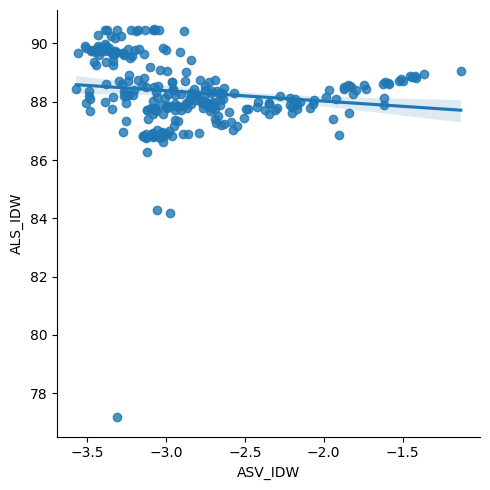

In [89]:
# plot correlation
sns.lmplot(x="ASV_IDW", y="ALS_IDW", data=valle_corr_asv)

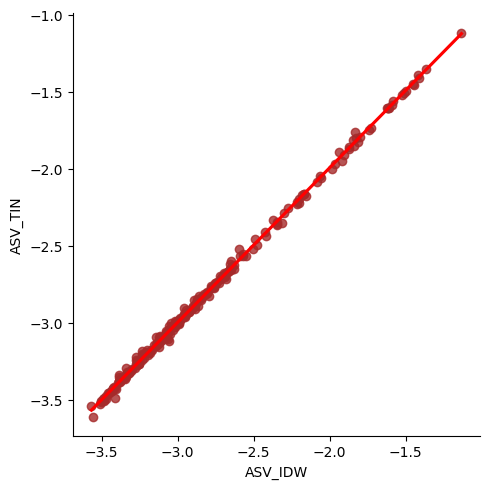

In [90]:
# bonus how similar values IDW and TIN interpolation models have
sns.lmplot(x="ASV_IDW", y="ASV_TIN",
            data=valle_corr_asv, line_kws={'color': 'red'}, scatter_kws={'color': 'brown'})

In [91]:
valle_corr_asv["ASV_IDW"].corr(valle_corr_asv["ASV_TIN"])  

0.999361444494639

# Correlation testing Nuorgam

In [92]:
nuorgam_corr_asv = pd.read_csv('../data/output/0.25/nuorgam_ASV_IDW_random_points.csv', delimiter=',')
nuorgam_corr_asv_TIN = pd.read_csv('../data/output/0.25/nuorgam_ASV_TIN_random_points.csv', delimiter=',')
nuorgam_corr_als = pd.read_csv('../data/output/0.25/nuorgam_ALS_random_points.csv', delimiter=',')

In [93]:
nuorgam_corr_als

,id,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,0,10.22,10.44,10.315714,10.314406,7,0.069869
1,1,11.45,13.27,12.108478,12.159341,46,0.760946
2,2,11.40,13.07,11.632083,11.635015,24,0.434645
3,3,12.03,13.22,12.460833,12.461536,12,0.441276
4,4,11.79,13.25,12.200000,12.158013,4,0.607330
...,...,...,...,...,...,...,...
295,295,10.91,11.21,11.101176,11.110039,17,0.070451
296,296,10.33,13.24,10.895455,11.103198,11,1.044043
297,297,11.76,13.11,11.908750,11.862543,16,0.316067
298,298,10.79,10.96,10.866667,10.882804,9,0.055377


In [94]:
nuorgam_corr_asv["ALS_IDW"] = nuorgam_corr_als["SAMPLE_4"]

In [95]:
nuorgam_corr_asv

,id,SAMPLE_1,ALS_IDW
0,0,-2.317614,10.314406
1,1,-1.576809,12.159341
2,2,-1.505205,11.635015
3,3,-0.957730,12.461536
4,4,-1.280672,12.158013
...,...,...,...
295,295,-1.782876,11.110039
296,296,-2.111305,11.103198
297,297,-1.194525,11.862543
298,298,-1.991329,10.882804


In [96]:
nuorgam_corr_asv['ASV_TIN'] = nuorgam_corr_asv_TIN['SAMPLE_1']

In [97]:
nuorgam_corr_asv

,id,SAMPLE_1,ALS_IDW,ASV_TIN
0,0,-2.317614,10.314406,-2.325
1,1,-1.576809,12.159341,-1.560
2,2,-1.505205,11.635015,-1.495
3,3,-0.957730,12.461536,-0.965
4,4,-1.280672,12.158013,-1.337
...,...,...,...,...
295,295,-1.782876,11.110039,-1.790
296,296,-2.111305,11.103198,-2.115
297,297,-1.194525,11.862543,-1.180
298,298,-1.991329,10.882804,-2.000


In [98]:
nuorgam_corr_asv = nuorgam_corr_asv.rename(columns={"SAMPLE_1": "ASV_IDW"})

In [99]:
nuorgam_corr_asv["ASV_IDW"] = nuorgam_corr_asv["ASV_IDW"].fillna(0)

In [100]:
nuorgam_corr_asv

,id,ASV_IDW,ALS_IDW,ASV_TIN
0,0,-2.317614,10.314406,-2.325
1,1,-1.576809,12.159341,-1.560
2,2,-1.505205,11.635015,-1.495
3,3,-0.957730,12.461536,-0.965
4,4,-1.280672,12.158013,-1.337
...,...,...,...,...
295,295,-1.782876,11.110039,-1.790
296,296,-2.111305,11.103198,-2.115
297,297,-1.194525,11.862543,-1.180
298,298,-1.991329,10.882804,-2.000


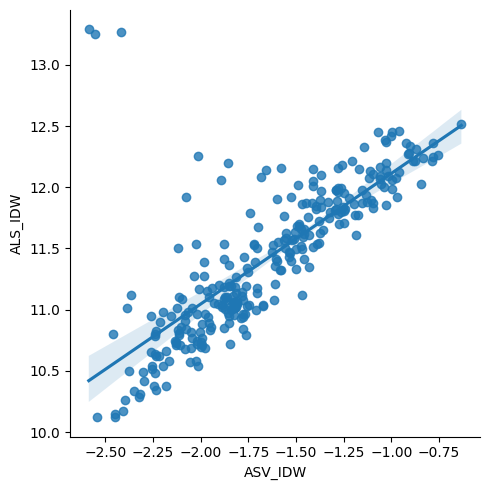

In [101]:
sns.lmplot(x="ASV_IDW", y="ALS_IDW", data=nuorgam_corr_asv)

In [102]:
nuorgam_corr_asv["ASV_IDW"].corr(nuorgam_corr_asv["ALS_IDW"])  

0.7647202734203874

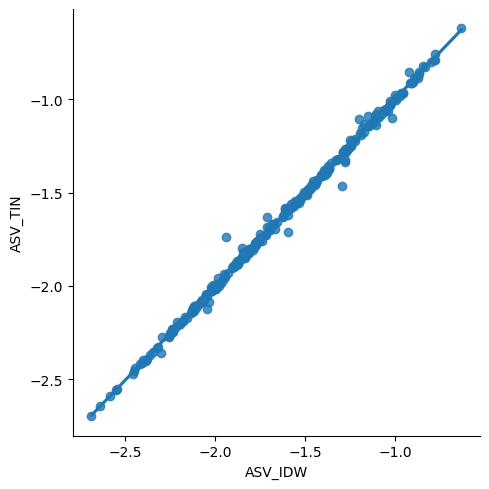

In [103]:
sns.lmplot(x="ASV_IDW", y="ASV_TIN", data=nuorgam_corr_asv)

In [104]:
nuorgam_corr_asv["ASV_IDW"].corr(nuorgam_corr_asv["ASV_TIN"])

0.9986093929245317

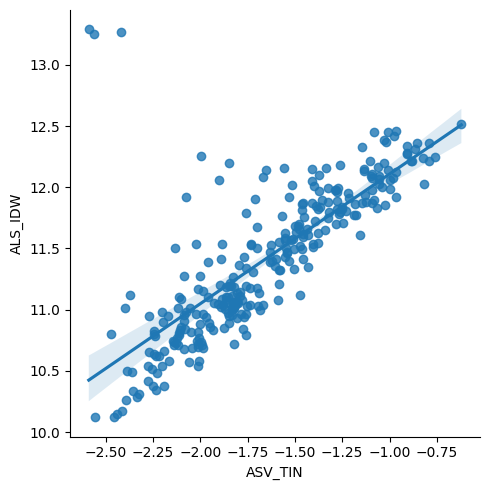

In [105]:
sns.lmplot(x="ASV_TIN", y="ALS_IDW", data=nuorgam_corr_asv)

In [106]:
nuorgam_corr_asv["ASV_TIN"].corr(nuorgam_corr_asv["ALS_IDW"])  

0.7612046269392452

# Linear Regression

In [107]:
# calculate linear regression for nuorgam als
x = nuorgam_als[['Elevation']]
y = nuorgam_als[['IDW']]

In [108]:
model = LinearRegression()

In [109]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.9689414156757721


In [110]:
import matplotlib.pyplot as plt

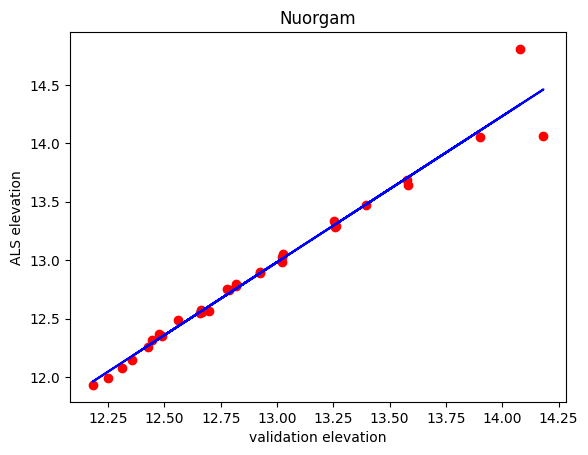

In [111]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('validation elevation')
plt.ylabel('ALS elevation')
plt.show()

In [112]:
# the same for ASV
x = nuorgam_asv[['Elevation']]
y = nuorgam_asv[['ASV_Elevation']]

In [113]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.3421801604585336


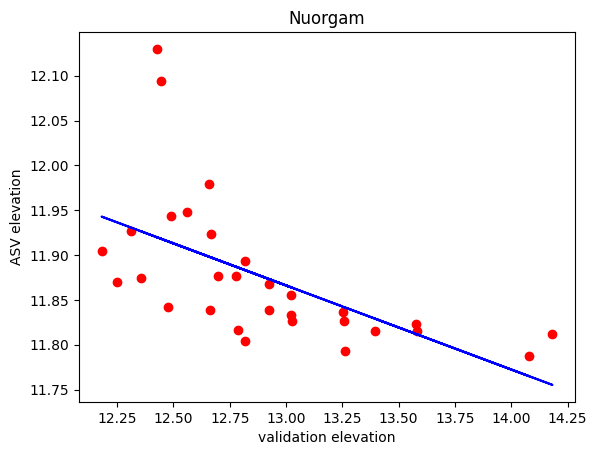

In [114]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('validation elevation')
plt.ylabel('ASV elevation')
plt.show()

In [115]:
# for valle asv
x = valle_asv[['Elevation']]
y = valle_asv[['ASV_Elevation']]

In [116]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.44577947248012084


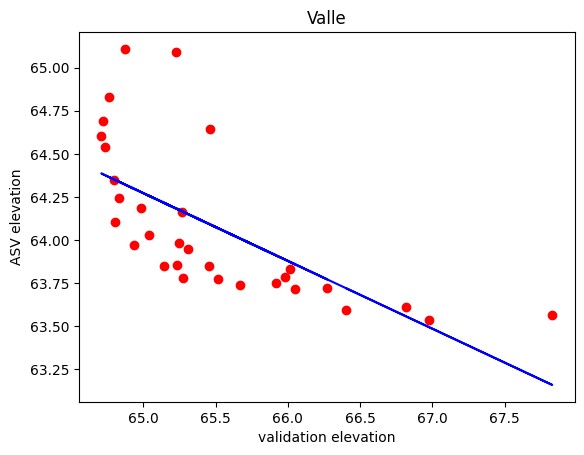

In [117]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Valle')
plt.xlabel('validation elevation')
plt.ylabel('ASV elevation')
plt.show()

In [118]:
# valle als
x = valle_als[['Elevation']]
y = valle_als[['IDW']]

In [119]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.981994064920988


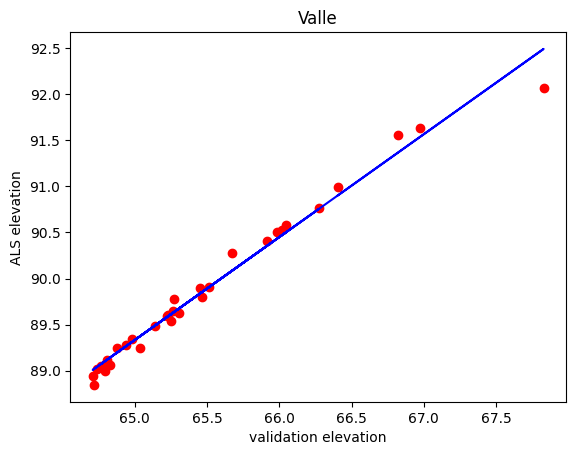

In [120]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Valle')
plt.xlabel('validation elevation')
plt.ylabel('ALS elevation')
plt.show()

In [121]:
# calculate new r2 for tin model
x = valle_TIN[['Elevation']]
y = valle_TIN[['ASV_Elevation']]

In [122]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.27444433848160643


## SENTINEL 2 ANALYSIS SHIT

In [123]:
valle_s2 = pd.read_csv('../data/output/satellite-analysis/valle_sentinel2_random_points.csv', delimiter=',')

In [124]:
a = valle_corr_asv[['ASV_IDW_SameAsALS']]
b = valle_corr_asv[['ALS_IDW']]

In [125]:
valle_s2.columns

Index(['id', 'SAMPLE_1', 'SAMPLE_2', 'SAMPLE_3', 'SAMPLE_4', 'SAMPLE_5',
       'SAMPLE_6', 'SAMPLE_7', 'SAMPLE_8', 'SAMPLE_9', 'SAMPLE_10',
       'SAMPLE_11', 'SAMPLE_12', 'SAMPLE_13', 'SAMPLE_14', 'SAMPLE_15',
       'SAMPLE_16', 'SAMPLE_17', 'SAMPLE_18', 'SAMPLE_19', 'SAMPLE_20',
       'SAMPLE_21', 'SAMPLE_22', 'SAMPLE_23'],
      dtype='object')

In [126]:
valle_s2 = valle_s2.drop(columns=
                           ['SAMPLE_1','SAMPLE_5','SAMPLE_6','SAMPLE_7','SAMPLE_9', 'SAMPLE_10','SAMPLE_12',
                            'SAMPLE_13', 'SAMPLE_14', 'SAMPLE_15','SAMPLE_16', 'SAMPLE_17',
                            'SAMPLE_18', 'SAMPLE_19', 'SAMPLE_20','SAMPLE_21', 'SAMPLE_22','SAMPLE_23'])

In [127]:
valle_s2

,id,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_8,SAMPLE_11
0,0,0.12010,0.11685,0.10970,0.11575,0.11125
1,1,0.11910,0.11535,0.11255,0.11400,0.11150
2,2,0.12040,0.11580,0.11285,0.11395,0.10970
3,3,0.11945,0.11795,0.11090,0.11375,0.11030
4,4,0.11935,0.11515,0.10970,0.11430,0.11280
...,...,...,...,...,...,...
295,295,0.12010,0.11835,0.11020,0.11430,0.11030
296,296,0.11930,0.11500,0.11140,0.11495,0.11300
297,297,0.12270,0.12260,0.11790,0.11720,0.11670
298,298,0.11930,0.11500,0.11140,0.11495,0.11300


In [128]:
# rename column
valle_s2 = valle_s2.rename(columns={"SAMPLE_2": "Band2-Blue", "SAMPLE_3": "Band3-Green", "SAMPLE_4": "Band4-Red", "SAMPLE_8": "Band8-NIR", "SAMPLE_11": "Band11-SWIR"})

In [129]:
valle_s2

,id,Band2-Blue,Band3-Green,Band4-Red,Band8-NIR,Band11-SWIR
0,0,0.12010,0.11685,0.10970,0.11575,0.11125
1,1,0.11910,0.11535,0.11255,0.11400,0.11150
2,2,0.12040,0.11580,0.11285,0.11395,0.10970
3,3,0.11945,0.11795,0.11090,0.11375,0.11030
4,4,0.11935,0.11515,0.10970,0.11430,0.11280
...,...,...,...,...,...,...
295,295,0.12010,0.11835,0.11020,0.11430,0.11030
296,296,0.11930,0.11500,0.11140,0.11495,0.11300
297,297,0.12270,0.12260,0.11790,0.11720,0.11670
298,298,0.11930,0.11500,0.11140,0.11495,0.11300


In [130]:
valle_corr_asv

,id,ASV_IDW,ALS_IDW,ASV_TIN,ASV_IDW_SameAsALS
0,0,-3.567644,88.430109,-3.540,86.748356
1,1,-2.655939,88.295792,-2.620,87.660061
2,2,-2.994284,89.052633,-3.010,87.321716
3,3,-2.806739,88.067866,-2.810,87.509261
4,4,-3.178693,88.751447,-3.180,87.137307
...,...,...,...,...,...
293,293,-3.387006,87.994366,-3.355,86.928994
294,294,-2.996475,87.822089,-3.000,87.319525
295,295,-3.361742,89.740000,-3.365,86.954258
297,297,-1.837714,87.612876,-1.855,88.478286


In [131]:
valle_corr_asv_test = pd.merge(
    valle_corr_asv,
    valle_s2[['id', 'Band2-Blue']],
    on='id',
    how='inner'
)
valle_corr_asv_test

,id,ASV_IDW,ALS_IDW,ASV_TIN,ASV_IDW_SameAsALS,Band2-Blue
0,0,-3.567644,88.430109,-3.540,86.748356,0.12010
1,1,-2.655939,88.295792,-2.620,87.660061,0.11910
2,2,-2.994284,89.052633,-3.010,87.321716,0.12040
3,3,-2.806739,88.067866,-2.810,87.509261,0.11945
4,4,-3.178693,88.751447,-3.180,87.137307,0.11935
...,...,...,...,...,...,...
255,293,-3.387006,87.994366,-3.355,86.928994,0.12065
256,294,-2.996475,87.822089,-3.000,87.319525,0.11945
257,295,-3.361742,89.740000,-3.365,86.954258,0.12010
258,297,-1.837714,87.612876,-1.855,88.478286,0.12270


In [132]:
valle_corr_asv_test['Lyzenga_Blue'] = valle_corr_asv_test['ASV_IDW_SameAsALS'] + (valle_corr_asv_test['ALS_IDW'] * valle_corr_asv_test['Band2-Blue'])

In [133]:
valle_corr_asv_test

,id,ASV_IDW,ALS_IDW,ASV_TIN,ASV_IDW_SameAsALS,Band2-Blue,Lyzenga_Blue
0,0,-3.567644,88.430109,-3.540,86.748356,0.12010,97.368812
1,1,-2.655939,88.295792,-2.620,87.660061,0.11910,98.176090
2,2,-2.994284,89.052633,-3.010,87.321716,0.12040,98.043653
3,3,-2.806739,88.067866,-2.810,87.509261,0.11945,98.028968
4,4,-3.178693,88.751447,-3.180,87.137307,0.11935,97.729792
...,...,...,...,...,...,...,...
255,293,-3.387006,87.994366,-3.355,86.928994,0.12065,97.545514
256,294,-2.996475,87.822089,-3.000,87.319525,0.11945,97.809873
257,295,-3.361742,89.740000,-3.365,86.954258,0.12010,97.732032
258,297,-1.837714,87.612876,-1.855,88.478286,0.12270,99.228386


In [154]:
# calculate new r2 for tin model
x = valle_corr_asv_test[['ALS_IDW']]
y = valle_corr_asv_test[['Band2-Blue']]

In [155]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.0010938278462897522


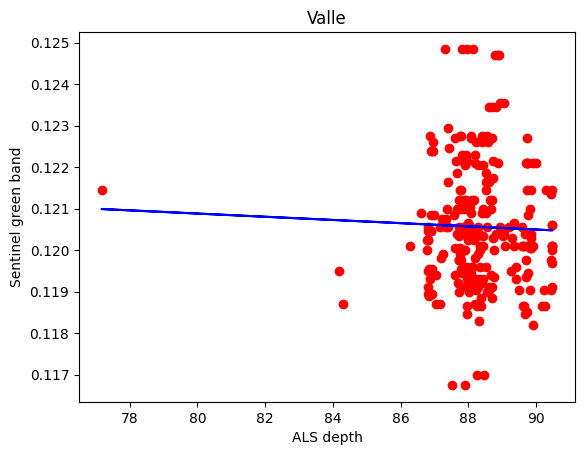

In [156]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Valle')
plt.xlabel('ALS depth')
plt.ylabel('Sentinel green band')
plt.show()

In [141]:
nuorgam_s2 = pd.read_csv('../data/output/satellite-analysis/nuorgam_sentinel2_random_points.csv', delimiter=',')

In [142]:
nuorgam_s2

,id,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6,SAMPLE_7,SAMPLE_8,SAMPLE_9,...,SAMPLE_14,SAMPLE_15,SAMPLE_16,SAMPLE_17,SAMPLE_18,SAMPLE_19,SAMPLE_20,SAMPLE_21,SAMPLE_22,SAMPLE_23
0,0,0.1250,0.1257,0.1207,0.1155,0.1144,0.1142,0.1138,0.1121,0.1090,...,0.246,0.0006,0.0016,0.0022,0.0026,0,0,0,0,0
1,1,0.1322,0.1255,0.1259,0.1185,0.1185,0.1175,0.1198,0.1133,0.1148,...,0.246,0.0006,0.0019,0.0027,0.0026,0,0,0,0,0
2,2,0.1255,0.1268,0.1242,0.1168,0.1151,0.1144,0.1167,0.1142,0.1112,...,0.246,0.0006,0.0018,0.0026,0.0028,0,0,0,0,0
3,3,0.1253,0.1270,0.1301,0.1257,0.1234,0.1134,0.1157,0.1126,0.1123,...,0.246,0.0006,0.0028,0.0031,0.0028,0,0,0,0,0
4,4,0.1277,0.1254,0.1270,0.1208,0.1214,0.1147,0.1210,0.1172,0.1160,...,0.246,0.0006,0.0022,0.0028,0.0027,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.1277,0.1244,0.1238,0.1172,0.1173,0.1152,0.1162,0.1138,0.1115,...,0.246,0.0006,0.0019,0.0025,0.0024,0,0,0,0,0
296,296,0.1257,0.1250,0.1235,0.1159,0.1145,0.1130,0.1141,0.1107,0.1130,...,0.246,0.0006,0.0017,0.0024,0.0026,0,0,0,0,0
297,297,0.1277,0.1256,0.1278,0.1192,0.1189,0.1164,0.1167,0.1142,0.1120,...,0.246,0.0006,0.0020,0.0029,0.0027,0,0,0,0,0
298,298,0.1250,0.1255,0.1233,0.1168,0.1162,0.1137,0.1146,0.1122,0.1118,...,0.246,0.0006,0.0018,0.0024,0.0026,0,0,0,0,0


In [143]:
nuorgam_s2 = nuorgam_s2.drop(columns=
                           ['SAMPLE_1','SAMPLE_5','SAMPLE_6','SAMPLE_7','SAMPLE_9', 'SAMPLE_10','SAMPLE_12',
                            'SAMPLE_13', 'SAMPLE_14', 'SAMPLE_15','SAMPLE_16', 'SAMPLE_17',
                            'SAMPLE_18', 'SAMPLE_19', 'SAMPLE_20','SAMPLE_21', 'SAMPLE_22','SAMPLE_23'])

In [144]:
# rename column
nuorgam_s2 = nuorgam_s2.rename(columns={"SAMPLE_2": "Band2-Blue", "SAMPLE_3": "Band3-Green", "SAMPLE_4": "Band4-Red", "SAMPLE_8": "Band8-NIR", "SAMPLE_11": "Band11-SWIR"})

In [145]:
nuorgam_corr_asv['green'] = nuorgam_s2['Band3-Green']

In [146]:
nuorgam_corr_asv['blue'] = nuorgam_s2['Band2-Blue']

In [147]:
nuorgam_corr_asv

,id,ASV_IDW,ALS_IDW,ASV_TIN,green,blue
0,0,-2.317614,10.314406,-2.325,0.1207,0.1257
1,1,-1.576809,12.159341,-1.560,0.1259,0.1255
2,2,-1.505205,11.635015,-1.495,0.1242,0.1268
3,3,-0.957730,12.461536,-0.965,0.1301,0.1270
4,4,-1.280672,12.158013,-1.337,0.1270,0.1254
...,...,...,...,...,...,...
295,295,-1.782876,11.110039,-1.790,0.1238,0.1244
296,296,-2.111305,11.103198,-2.115,0.1235,0.1250
297,297,-1.194525,11.862543,-1.180,0.1278,0.1256
298,298,-1.991329,10.882804,-2.000,0.1233,0.1255


In [148]:
nuorgam_corr_asv = nuorgam_corr_asv.dropna()

In [149]:
# calculate new r2 for tin model
x = nuorgam_corr_asv[['ALS_IDW']]
y = nuorgam_corr_asv[['green']]

In [150]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.4418421334817788


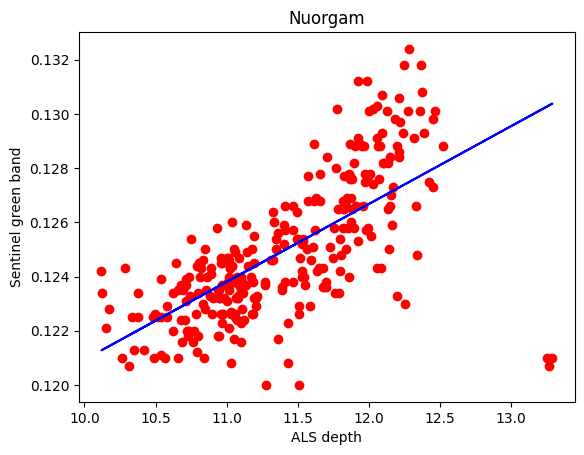

In [151]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('ALS depth')
plt.ylabel('Sentinel green band')
plt.show()